Instal and import nimare version 0.0.10rc2 

In [1]:
pip install duecredit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nimare==0.0.10rc2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nimare

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [4]:
nimare.__version__

'0.0.10rc2'

# Import librairies

In [5]:
import os
import pandas as pd
import nimare as nm 

from nilearn.image import math_img
from nilearn.plotting import plot_stat_map

from nimare.correct import FWECorrector
from nimare.io import convert_sleuth_to_dataset
from nimare.meta.cbma import ALE, ALESubtraction
from nimare.tests.utils import get_test_data_path

Import files containing the data of the included experiments 

In [6]:
need_file = ('/Users/laurencegrenier/Desktop/Fasted-satieted_hunge in response to relevant stimuli - copie (1) - copie.txt')

want_file = ('/Users/laurencegrenier/Desktop/coordonnées désir-wants all (1) - copie.txt')


Convert the files into sleuth files so the ALE meta-analysis could be operate 

In [7]:
need_set = convert_sleuth_to_dataset(need_file)

want_set = convert_sleuth_to_dataset(want_file)

Explore the Data

In [8]:
need_set.coordinates.columns

Index(['id', 'study_id', 'contrast_id', 'x', 'y', 'z', 'space', 'i', 'j', 'k'], dtype='object')

# Generating MA map for each study

MA maps of the need_set 

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code     

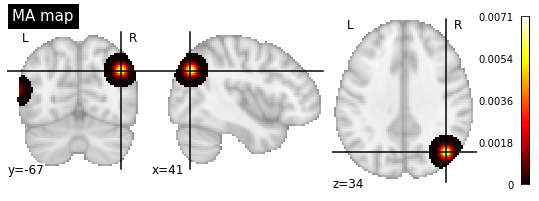

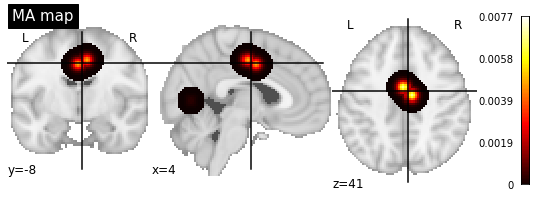

In [9]:
from nimare.meta.kernel import ALEKernel

kernel = nm.meta.kernel.ALEKernel() 

need_MA = kernel.transform(need_set, return_type="image")

plot_stat_map(need_MA[2], title="MA map")
plot_stat_map(need_MA[3], title="MA map")

type(need_MA)

print(need_MA[2])

print(need_MA[3])

In [10]:
type(need_MA[3]) #verify it's in the good format

nibabel.nifti1.Nifti1Image

MA maps of the want_set

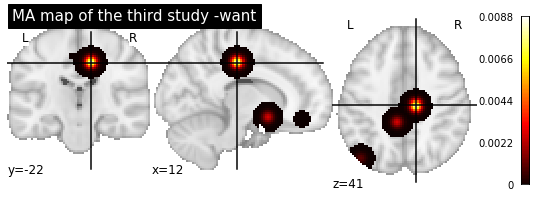

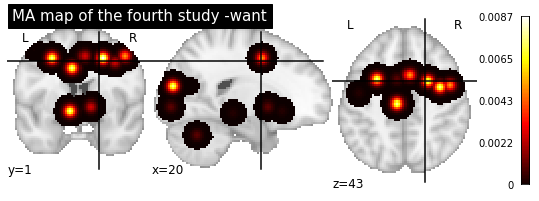

In [11]:
kernel = nm.meta.kernel.ALEKernel() 

want_MA = kernel.transform(want_set, return_type="image")

plot_stat_map(want_MA[2], title="MA map of the third study -want")
plot_stat_map(want_MA[3], title="MA map of the fourth study -want")

# Prepare the data for machine learning
-Mask to select the grey matter

In [12]:
from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting
import matplotlib.pyplot as plt

from nilearn.plotting import plot_anat, plot_stat_map, plot_img, plot_roi

In [13]:
#creating the mask 
mask_img = load_mni152_brain_mask()
masker = NiftiMasker(mask_img=mask_img, standardize = False, mask_strategy = 'template')
mask = masker.fit()
type(mask)

nilearn.input_data.nifti_masker.NiftiMasker

In [14]:
#Apply the mask on all of the studies in the need_set 
print(len(need_MA))


need_mask = []

for i in range (len(need_MA)): 
    need_img = need_MA[i]
    need_MA_mask = mask.fit_transform(need_img)
    
    need_mask.append(need_MA_mask) 
print(len(need_mask))

38
38


In [15]:
#Apply the mask on all of the studies in the want_set 
print(len(need_MA))


want_mask = []

for i in range (len(want_MA)): 
    want_img = want_MA[i]
    want_MA_mask = mask.fit_transform(want_img)
    
    want_mask.append(want_MA_mask) 
print(len(want_mask))

38
33


In [16]:
print(type(want_mask))
print(need_mask) 
len(need_mask)

<class 'list'>
[array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.37026548e-12, 7.86974837e-12, 0.00000000e+00]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[1.05694523e-06, 9.49356996e-07, 6.87956167e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ...,

38

In [17]:
#Fix the 3D problem, convert 3D array of the 38 element of the list into 1D array (concatenate all the dimensions) 

Reducing dimension of the need_mask by transforming each of the need_mask[i] element into an array of 1D 

In [18]:
need_reduce_mask = []
for i in range (len(need_mask)): 
    a = need_mask[i] #create a variable for the array of the item in the need_mask list 
    b = a.view() #.view to make sure that the initial data doesn't get modify 
    c = b.reshape(228453) #reshape the b which means reshape the need_mask[i] into 1D of 228 453 voxels 
    need_reduce_mask.append(c) #create a new array containing the 38 element of need_mask reshape into 1D 
    print(c) 

print(need_reduce_mask)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.37026548e-12
 7.86974837e-12 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1.05694523e-06 9.49356996e-07 6.87956167e-07 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[6.35488070e-11 4.45746201e-10 2.41140708e-09 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ...

In [19]:
print(len(need_mask[1]))
print(len(need_reduce_mask[1]))
#check if the reduce dimension worked 

1
228453


Reducing dimension of the want_mask by transforming each of the need_mask[i] element into an array of 1D

In [20]:
want_reduce_mask = []
for i in range (len(want_mask)): 
    a = want_mask[i] #create a variable for the array of the item in the need_mask list 
    b = a.view() #.view to make sure that the initial data doesn't get modify 
    c = b.reshape(228453) #reshape the b which means reshape the need_mask[i] into 1D of 228 453 voxels 
    want_reduce_mask.append(c) #create a new array containing the 38 element of need_mask reshape into 1D 
    print(c) 

print(want_reduce_mask)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1.87374494e-05 3.65598204e-05 5.45984360e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., .

In [21]:
len(want_reduce_mask[1])

228453

Creating the variables of the model 
X = features (71)
y = condition (need/want) 

In [22]:
#Making the X variable of the model, concatenante the need_reduce_mask and the want_reduce_mask 

X = need_reduce_mask + want_reduce_mask 
#print(X)
print(X[1][228433])

print(len(X))

0.0
71


Creating the variable Y : 0 = needs, 1 = wantings 

In [24]:
y = []
for i in range (38): 
    y_i = 0 
    y.append(y_i)
print(y)
len(y)

for i in range (33): 
    y_i = 1 
    y.append(y_i)
print(y) 
len(y)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


71

# Creating the machine learning model 

In [25]:
#Make sure that X and y are ok 
print(X)
print(y)
type(X)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.37026548e-12, 7.86974837e-12, 0.00000000e+00]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1.05694523e-06, 9.49356996e-07, 6.87956167e-07, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array

list

In [26]:
import numpy as np
np.save("test_data/X.npy", X)
np.save("test_data/y.npy", y)

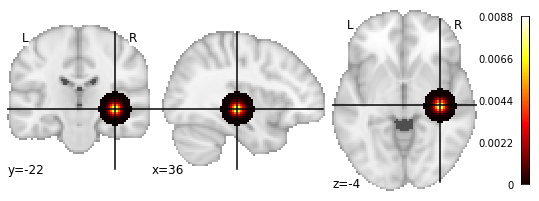

In [27]:
MA_plt_mask = mask.inverse_transform(X[0])
MA_mask_map = plot_stat_map(MA_plt_mask)
plt.show()

#Make sure that the operations went well, retrieve the data of the map by using X 

Separating the data into training data and test (validation) data 

In [28]:
#split the sample to training/test set 
from sklearn.model_selection import train_test_split


X_train1, X_test, y_train1, y_test = train_test_split(
                                                    X, # x
                                                    y, # y
                                                    test_size = 0.25, # 75%25% split 
                                                    random_state = 123, #same shuffle each time 
                                                    shuffle = True, # shuffle dataset before splitting                                                        # before splitting
                                                    stratify = y,# keep
                                                                                  # distribution
                                                                                  # of conditions
                                                                                  # consistent
                                                                                  # betw. train
                                                                                  # & test sets.
                                                                                  )

# print the size of our training and test (validation) groups
print('training:', len(X_train1),
     'testing:', len(X_test))
print (X_train1)

training: 53 testing: 18
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 

In [29]:
#Split into training/validation set 
X_train2, X_val, y_train2, y_val = train_test_split(
                                                    X_train1, # x
                                                    y_train1, # y
                                                    test_size = 0.4, # 60%/40% split 
                                                    random_state = 123, #same shuffle each time 
                                                    shuffle = True, # shuffle dataset before splitting                                 
                                                    stratify = y_train1,# keep
                                                                                  # distribution
                                                                                  # of conditions
                                                                                  # consistent
                                                                                  # betw. train
                                                                                  # & test sets.
                                                                                  )

# print the size of our training and test (validation) groups
print('training:', len(X_train2),
     'testing:', len(X_val))

training: 31 testing: 22


In [30]:
# 71 = 31 (training) + 22 (validation) + 18 (testing)

Let's create the model 

In [31]:
from sklearn.svm import SVC

l_svc = SVC(kernel='linear') # define the model

l_svc.fit(X_train2, y_train2) # fit the model

SVC(kernel='linear')

In [32]:
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import seaborn as sns

accuracy =  0.5454545454545454
MAE =  0.45454545454545453


/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predicted Conditions')

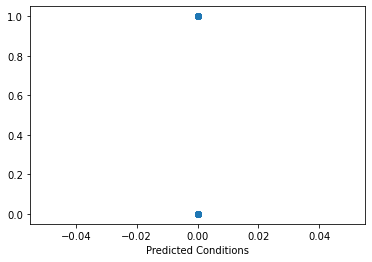

In [33]:
# predict the *validation* data based on the model trained on X_train2
y_pred = l_svc.predict(X_val) 

# caluclate the model accuracy
acc = l_svc.score(X_val, y_val) 
mae = mean_absolute_error(y_true=y_val,y_pred=y_pred)

# print results
print('accuracy = ', acc)
print('MAE = ',mae)

sns.regplot(y_pred,y_val)
plt.xlabel('Predicted Conditions')

Confusion matrix 

In [34]:
from sklearn.metrics import confusion_matrix

matrix_con_val1 = confusion_matrix(y_true = y_val, y_pred = y_pred) 

print(matrix_con_val1)

[[12  0]
 [10  0]]


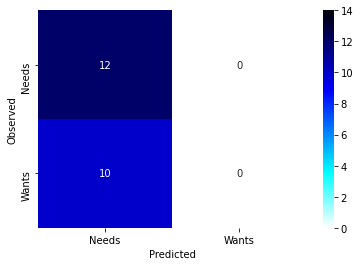

In [35]:
from pandas import DataFrame

cmdf1 = DataFrame(matrix_con_val1, index = ['Needs','Wants'], columns = ['Needs','Wants'])

import seaborn as sns

ax_val1 = sns.heatmap(cmdf1, cmap = "black_blue_r", vmin = 0, vmax = 14, annot = True) #cmap = 'red_transparent_full_alpha_range', center = 8, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Observed')
ax_val1.figure.savefig("Val_Confusion_matrice_1.png")

In [36]:
#Not good...maybe because most of the values are 0 and the non-zero values are still near to 0... 
#Try to change the scale and see 
#exp = np.exp(10*x)-1 

Transform the X data into exponential 

In [37]:
X = np.array(X)

In [38]:
X_exp = np.exp(np.array(X)*100)-1

In [39]:
X_exp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X_exp[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
#split the sample to training/test set...again...
from sklearn.model_selection import train_test_split


X_train1, X_test, y_train1, y_test = train_test_split(
                                                    X_exp, # x
                                                    y, # y
                                                    test_size = 0.25, # 75%25% split 
                                                    random_state = 123, #same shuffle each time 
                                                    shuffle = True, # shuffle dataset before splitting                                                        # before splitting
                                                    stratify = y,# keep
                                                                                  # distribution
                                                                                  # of conditions
                                                                                  # consistent
                                                                                  # betw. train
                                                                                  # & test sets.
                                                                                  )

# print the size of our training and test (validation) groups
print('training:', len(X_train1),
     'testing:', len(X_test))
print (X_train1)

training: 53 testing: 18
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
#Split into training/validation set 
X_train2, X_val, y_train2, y_val = train_test_split(
                                                    X_train1, # x
                                                    y_train1, # y
                                                    test_size = 0.4, # 60%/40% split 
                                                    random_state = 123, #same shuffle each time 
                                                    shuffle = True, # shuffle dataset before splitting                                 
                                                    stratify = y_train1,# keep
                                                                                  # distribution
                                                                                  # of conditions
                                                                                  # consistent
                                                                                  # betw. train
                                                                                  # & test sets.
                                                                                  )

# print the size of our training and test (validation) groups
print('training:', len(X_train2),
     'testing:', len(X_val))

training: 31 testing: 22


In [43]:
from sklearn.svm import SVC

l_svc = SVC(kernel='linear') # define the model

l_svc.fit(X_train2, y_train2) # fit the model

SVC(kernel='linear')

In [44]:
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import seaborn as sns

accuracy =  0.8181818181818182
MAE =  0.18181818181818182


/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predicted Conditions')

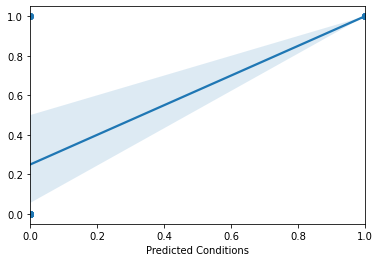

In [45]:
# predict the *validation* data based on the model trained on X_train2
y_pred = l_svc.predict(X_val) 

# caluclate the model accuracy
acc = l_svc.score(X_val, y_val) 
mae = mean_absolute_error(y_true=y_val,y_pred=y_pred)

# print results
print('accuracy = ', acc)
print('MAE = ',mae)

sns.regplot(y_pred,y_val)
plt.xlabel('Predicted Conditions')

In [46]:
matrix_con_val2 = confusion_matrix(y_true = y_val, y_pred = y_pred) 

In [47]:
print(matrix_con_val2)

[[12  0]
 [ 4  6]]


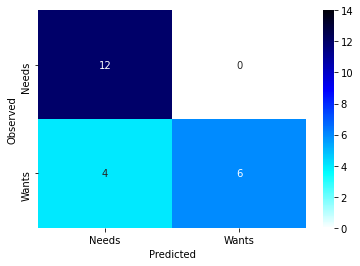

In [48]:
from pandas import DataFrame
cmdf2 = DataFrame(matrix_con_val2, index = ['Needs','Wants'], columns = ['Needs','Wants'])

import seaborn as sns

ax_val2 = sns.heatmap(cmdf2, cmap = "black_blue_r", vmin = 0, vmax = 14, annot = True) #cmap = 'red_transparent_full_alpha_range', center = 8, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Observed')
ax_val2.figure.savefig("Val_Confusion_matrice_2.png")

Retrieve the features which contributes the most to the classification 

In [49]:
l_svc.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.78683124e-12, -1.02621773e-11,  0.00000000e+00]])

In [50]:
coef = np.abs(l_svc.coef_)

In [51]:
coef

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.78683124e-12, 1.02621773e-11, 0.00000000e+00]])

In [52]:
len(coef[0]) #chaque voxel a un coeficient de corrélation 

228453

In [53]:
coef[0][1]

0.0

In [54]:
essai = mask.inverse_transform(coef)

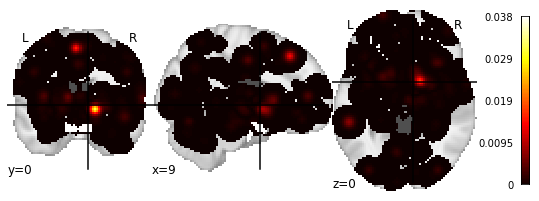

In [55]:
essai_map = plot_stat_map(essai)
plt.show()

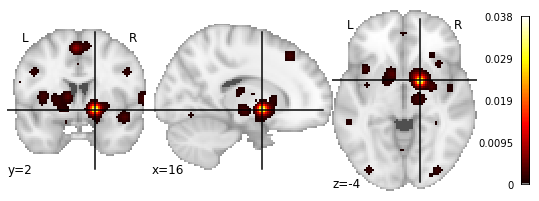

In [56]:
essai_map = plot_stat_map(essai, threshold=0.001)
plt.show()


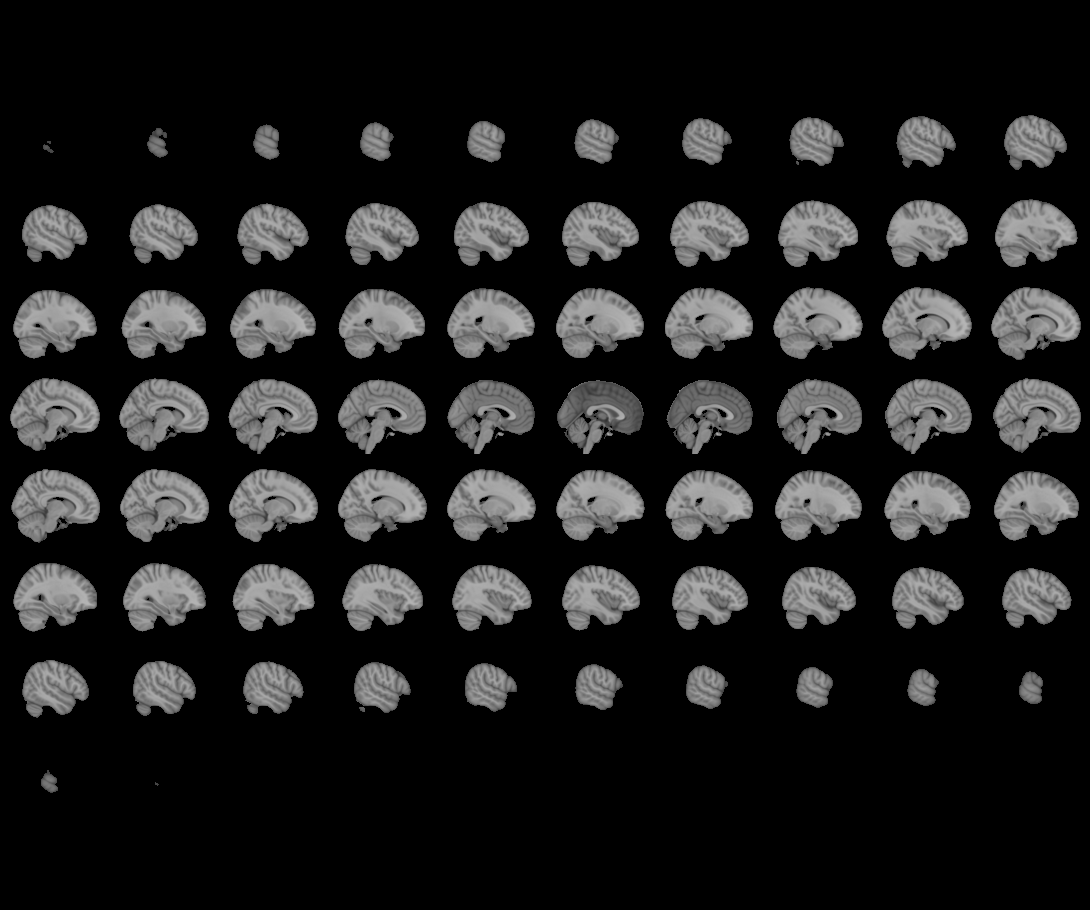
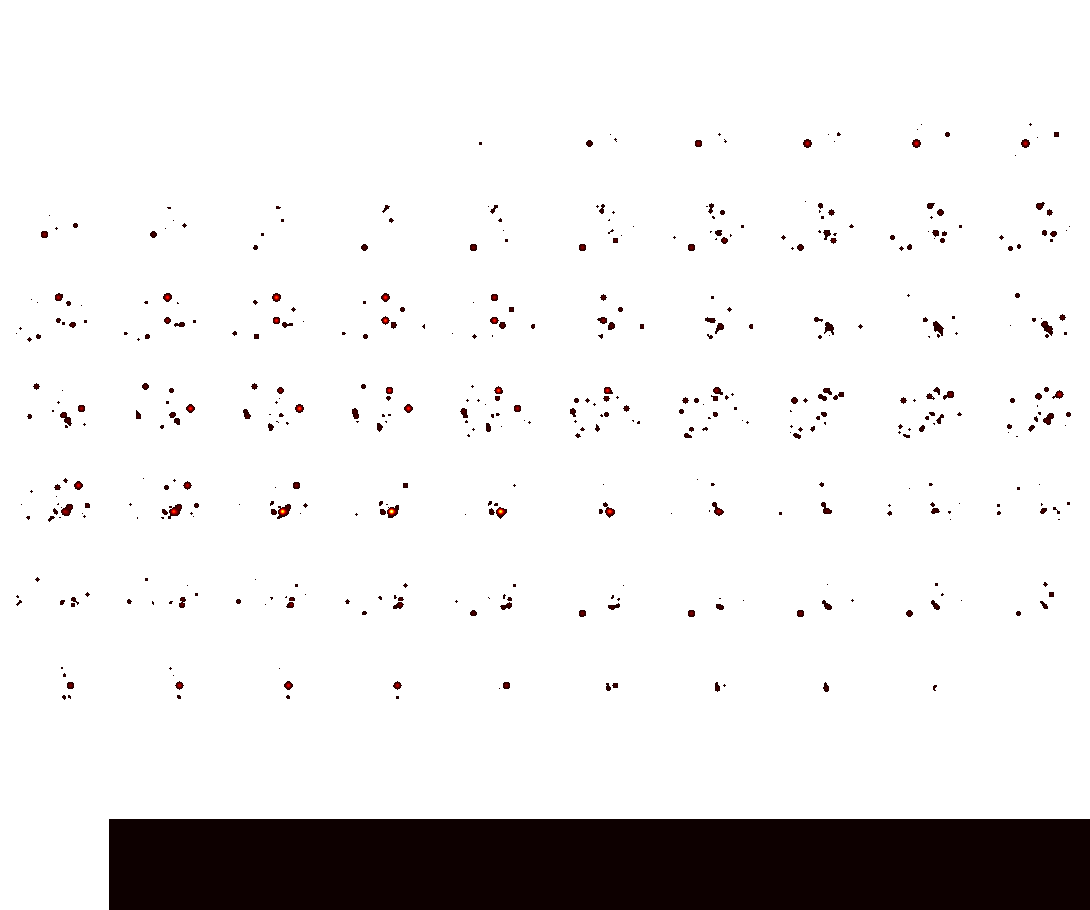

In [57]:
#Save the image to show in the presentation 
from nilearn import plotting
from nilearn.plotting import view_img

feature_img = plotting.view_img(essai, threshold=0.001) 
feature_img

In [58]:
#Save the image 
feature_img.save_as_html("Validation Model coeficient features image.html")
essai_map.savefig('Validation Model coeficient features map.png')

Test the model on test set 

In [59]:
l_svc.fit(X_train1,y_train1)

SVC(kernel='linear')

accuracy =  0.8333333333333334
MAE =  0.16666666666666666


/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predicted Conditions')

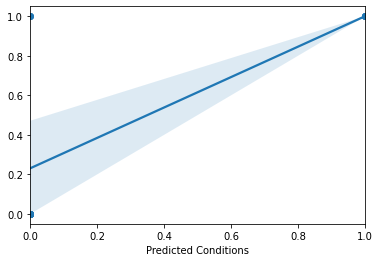

In [60]:
# predict the *validation* data based on the model trained on X_train2
y_pred = l_svc.predict(X_test) 

# caluclate the model accuracy
acc = l_svc.score(X_test, y_test) 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

# print results
print('accuracy = ', acc)
print('MAE = ',mae)

sns.regplot(y_pred,y_test)
plt.xlabel('Predicted Conditions')

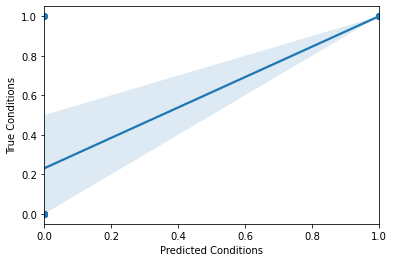

In [61]:
#save the image to show in the presentation 
import pandas as pd
x, y2 = pd.Series(y_pred, name="Predicted Conditions"), pd.Series(y_test, name="True Conditions")
accuracy = sns.regplot(x=x, y=y2)
accuracy.figure.savefig("accuracy.png")

In [62]:
matrix_con_test = confusion_matrix (y_true = y_test, y_pred = y_pred) 

In [63]:
print(matrix_con_test)

[[10  0]
 [ 3  5]]


In [64]:
from pandas import DataFrame
cmdf3 = DataFrame(matrix_con_test, index = ['Needs','Wants'], columns = ['Needs','Wants'])

In [65]:
import seaborn as sns

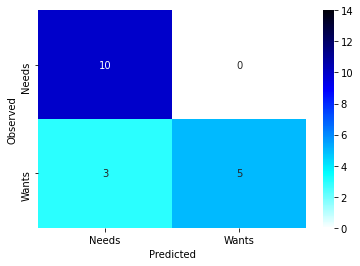

In [66]:
ax = sns.heatmap(cmdf3, cmap = "black_blue_r", vmin = 0, vmax = 14, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Observed')
ax.figure.savefig("Confusion_matrice_test.png")

In [67]:
l_svc.coef_

array([[ 3.80989403e-06,  7.44035510e-06,  1.11214602e-05, ...,
        -1.41961701e-12, -8.15318262e-12,  0.00000000e+00]])

In [68]:
coef2 = np.abs(l_svc.coef_)
print(coef2)

[[3.80989403e-06 7.44035510e-06 1.11214602e-05 ... 1.41961701e-12
  8.15318262e-12 0.00000000e+00]]


In [69]:
coef3 = l_svc.coef_

In [70]:
essai3= mask.inverse_transform(coef3)
essai2 = mask.inverse_transform(coef2)

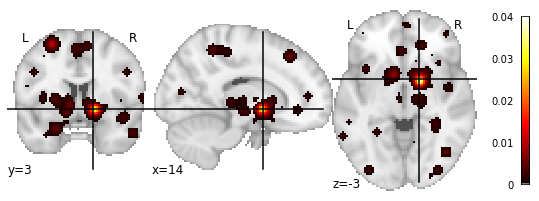

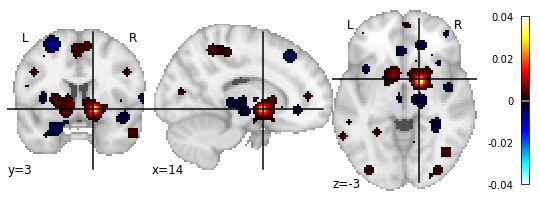

In [71]:
essai2_map = plot_stat_map(essai2, threshold=0.001)
essai3_map = plot_stat_map(essai3, threshold=0.001)
essai3_map.savefig('Coeficient map')
essai2_map.savefig('Abs Coeficient map')

In [72]:
from nilearn import plotting 
from nilearn.plotting import view_img_on_surf 

features_plot = plotting.view_img_on_surf(essai3)

In [73]:
features_plot

In [74]:
features_plot.save_as_html("Model coeficient features interactive plot.html")